In [36]:
import pandas as pd

df = pd.read_csv('../data/desafio_indicium_imdb.csv')

print('csv lido!')

csv lido!


In [37]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Iniciando tratamento dos dados.
- Corrigindo colunas
- Corrigindo dados que serão importantes no momento das operações matemáticas

In [39]:
df['Runtime'] = df['Runtime'].str.replace(' min', '')#remove min e deixa o espaço vazio
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce') #converte a coluna para numérica, caso não consiga, deixa valores nulo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(3), object(11)
memory usage: 125.0+ KB


In [40]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB


In [41]:
#vamos remover a colunma Unnamed, pois ela não será utilizada na nossa analise explorária
df = df.drop(columns=['Unnamed: 0'])

df.head() #verificando se a coluna foi removida

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [42]:
df.isnull().sum() #verificando quantos valores nulos temos em cada coluna

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [43]:
#vamos utilizar a mediana para preencher os valores nulos na coluna Gross e Meta_score
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

print('valores nulos preenchidos!')

valores nulos preenchidos!


In [44]:
#agora com a coluna Certificate, vamos utilizar a moda, que são os valores que aparecem com mais frequência
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

In [45]:
df.info() #veirificando se ainda temos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 117.2+ KB


Para termos uma boa resposta da primeira pergunta da etapa 2. Antes, vamos analisar o motivo de indicarmos o filmes.

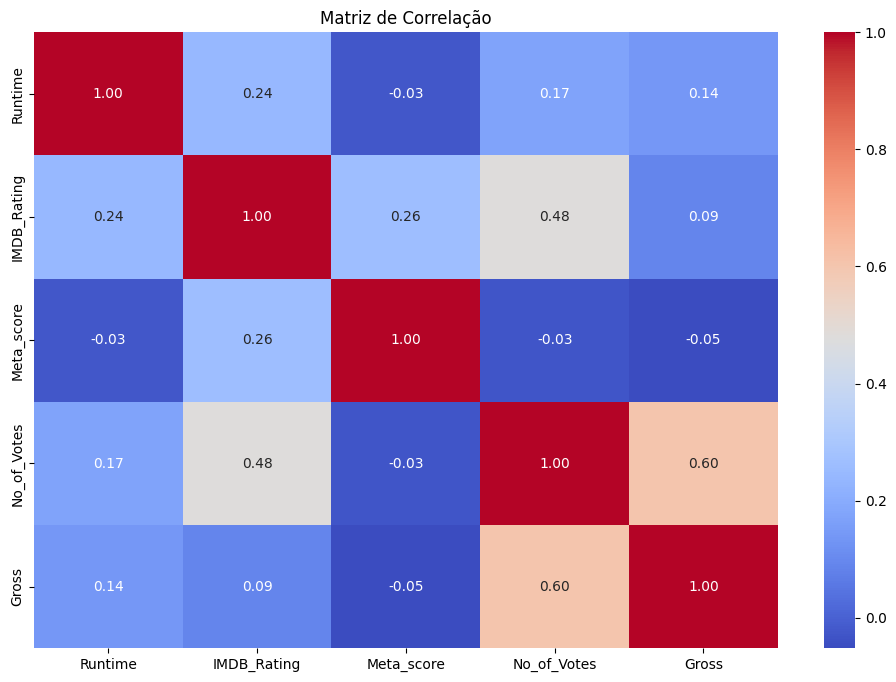

In [46]:
#Alternativa B - Análise de Faturamento

import matplotlib.pyplot as plt
import seaborn as sns

matriz_correlacao = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f') #criação do gráfico
plt.title('Matriz de Correlação')
plt.show()
#esse gráfico nos vai dar uma noção de quais colunas tem maior correlação com a coluna Gross, que é a nossa variável alvo.

In [47]:
#o número de votos não é a única coluna que estabelece motivos para um bom faturamento, vamos trabalhar com colunas não númericas (gêneros):

faturamento_por_genero = df.groupby('Genre')['Gross'].median().sort_values(ascending=False) #agrupa em tabelas e ordena em ordem decrescente
print(faturamento_por_genero.head(10))

Genre
Family, Sci-Fi                435110554.0
Action, Adventure, Fantasy    307269663.5
Action, Adventure, Family     301959197.0
Adventure, Fantasy            280685211.5
Adventure, Thriller           260000000.0
Animation, Comedy, Crime      251513985.0
Adventure, Family, Fantasy    249358727.0
Action, Adventure, Sci-Fi     233921534.0
Action, Adventure, Comedy     221660006.5
Action, Adventure, Mystery    209028679.0
Name: Gross, dtype: float64


In [48]:
#criar uma nova cópia do DataFrame para não alterar o original nesta etapa de descobrimos qual genero que gera mais faturamento
df_generos = df.copy()

df_generos['Genre'] = df_generos['Genre'].str.split(', ')

df_generos = df_generos.explode('Genre')

print(df_generos.head())

      Series_Title Released_Year Certificate  Runtime   Genre  IMDB_Rating  \
0    The Godfather          1972           A      175   Crime          9.2   
0    The Godfather          1972           A      175   Drama          9.2   
1  The Dark Knight          2008          UA      152  Action          9.0   
1  The Dark Knight          2008          UA      152   Crime          9.0   
1  The Dark Knight          2008          UA      152   Drama          9.0   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
1  When the menace known as the Joker wreaks havo...        84.0   
1  When the menace known as the Joker wreaks havo...        84.0   

               Director           Star1         Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando     Al Pac

In [49]:
#agora saberemos qual gênero individual gera mais faturamento
faturamento_por_genero_individual = df_generos.groupby('Genre')['Gross'].median().sort_values(ascending=False)

print(faturamento_por_genero_individual.head(10))

Genre
Adventure    64898511.00
Sci-Fi       57938693.00
Action       43000000.00
Biography    32572577.00
Family       31637200.00
History      23494165.75
Drama        23457439.50
Crime        23457439.50
Fantasy      23457439.50
Comedy       23457439.50
Name: Gross, dtype: float64


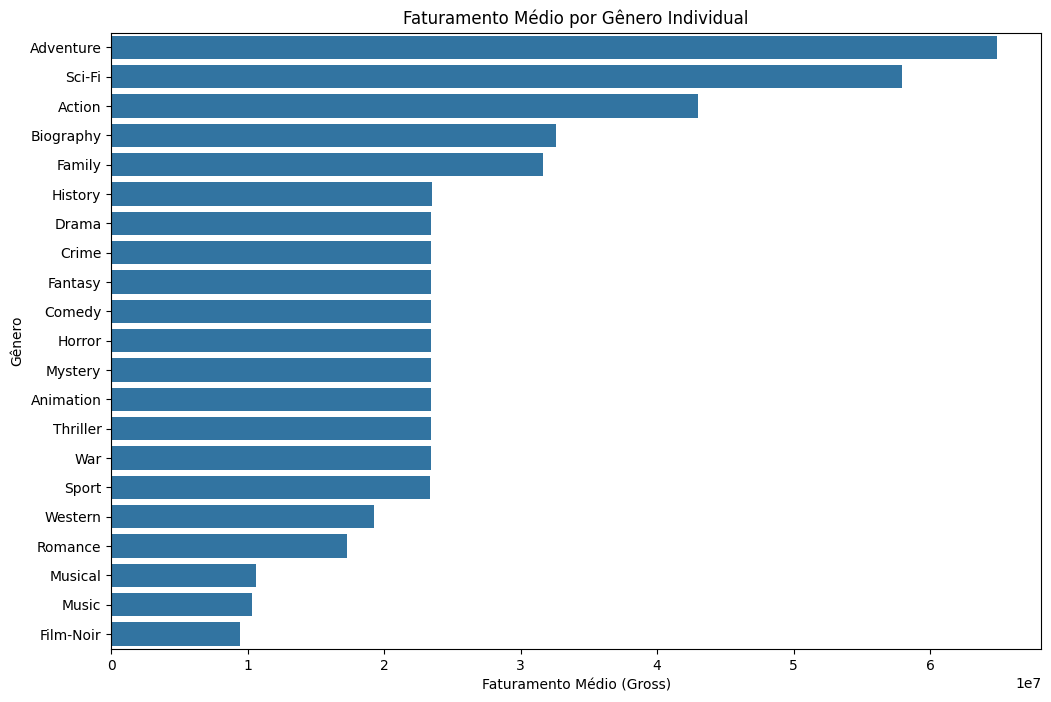

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(x=faturamento_por_genero_individual.values, y=faturamento_por_genero_individual.index)

plt.title('Faturamento Médio por Gênero Individual')
plt.xlabel('Faturamento Médio (Gross)')
plt.ylabel('Gênero')
plt.show()

# Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 
De acordo com os gráficos, podemos torna claro aa informações de que: O Número de votos, engajamento, é um fator crucial financeiramente. Quanto mais engajamento, mais pessoas vão assistir o filme e consequentemete gera mais lucro.
E, não podemos esquecer que o gênero também é um fator importante para que o faturamente do filme ocorra.

Em ambas as pesquisas, podemos analisar a correlação